In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Распределение Пуассона

### 1.

В новом микрорайоне поставлено 10000 кодовых замков на входных дверях домов. Вероятность выхода из строя одного замка в течение месяца равна 0,0002. 

Найти вероятность того, что за месяц откажет ровно 1 замок.

In [2]:
n = 10000
p = 0.0002
lambda_ = n * p

In [3]:
# функция с заданной лябмдой
poisson_dist = stats.poisson(mu=lambda_)
# сломается ровно 1 замок
answer = poisson_dist.pmf(1)
print(f'Вероятность, что в течение месяца сломается 1 замок: {answer:.4f}')

Вероятность, что в течение месяца сломается 1 замок: 0.2707


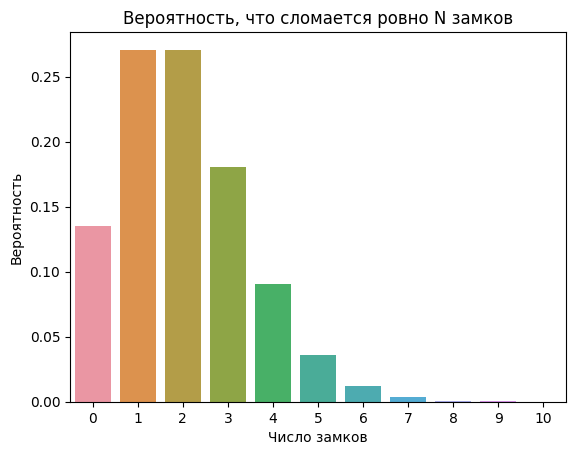

In [4]:
#прикинием распределения для вероятности сломаться от 0 до 10 замков
x = np.arange(11)
sns.barplot(x=x, y=poisson_dist.pmf(x))
plt.title('Вероятность, что сломается ровно N замков')
plt.xlabel('Число замков')
plt.ylabel('Вероятность')
plt.show()

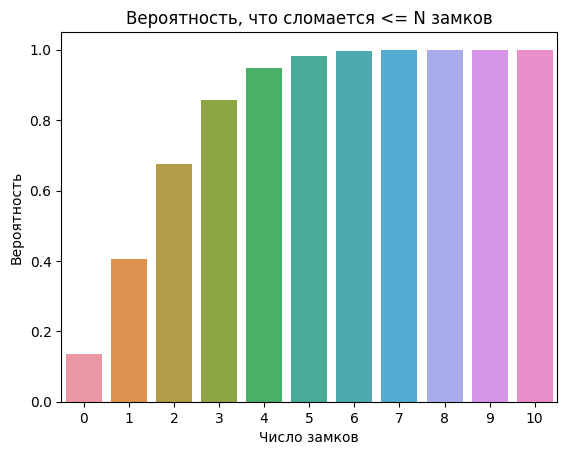

In [5]:
sns.barplot(x=x, y=poisson_dist.cdf(x))
plt.title('Вероятность, что сломается <= N замков')
plt.xlabel('Число замков')
plt.ylabel('Вероятность')
plt.show()

### 2.

Вероятность изготовления  бракованных деталей при их массовом производстве равна 0.001. 

Определить вероятность того, что в партии из 800 деталей будет: а) ровно 2 бракованные, б) не более двух.

In [6]:
n = 800
p = 1e-3
lambda_ = n * p

In [7]:
poisson_dist = stats.poisson(mu=lambda_)

In [8]:
# ровно 2 бракованные детали
only_two = poisson_dist.pmf(2)
print(f'Только 2 бракованные детали {only_two:.4f}')

# не более 2х деталей
lq_two = poisson_dist.cdf(2)
print(f'Не более 2 бракованных деталей {lq_two:.4f}')

Только 2 бракованные детали 0.1438
Не более 2 бракованных деталей 0.9526


### 3.

Среднее число автомобилей, проходящих таможенный досмотр в течение часа, равно 3. 

Найти вероятность того, что: а) за 2 часа пройдут досмотр от 7 до 10 автомобилей; б) за полчаса успеет пройти досмотр только 1 автомобиль.

In [9]:
lambda_ = 3
lambda_for_2_hours = lambda_ * 2
lambda_for_half_hour = lambda_ * 0.5

In [10]:
# от 7 до 10 автомобилей
psn_1 = stats.poisson(lambda_for_2_hours)
result = sum(psn_1.pmf(np.arange(7, 11)))
print(f'Вероятность, что 7-10 автомобилей пройдут за 2 часа: {result:.4f}')

Вероятность, что 7-10 автомобилей пройдут за 2 часа: 0.3511


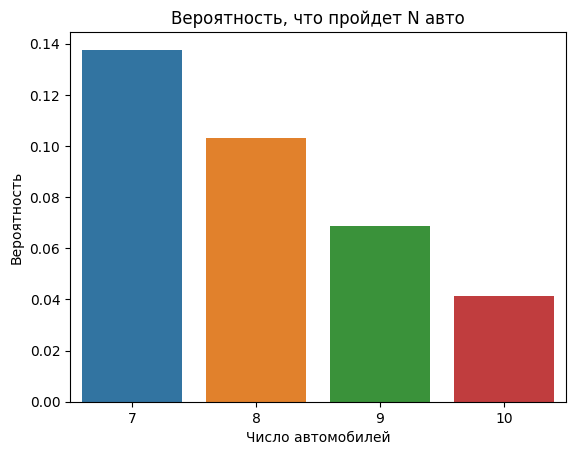

In [11]:
x = np.arange(7, 11)
sns.barplot(x=x, y=psn_1.pmf(x))
plt.title('Вероятность, что пройдет N авто')
plt.xlabel('Число автомобилей')
plt.ylabel('Вероятность')
plt.show()

In [12]:
# только 1 авто за полчаса
psn_1 = stats.poisson(lambda_for_half_hour)
result = psn_1.pmf(1)
print(f'Вероятность, что 1 авто за полчаса: {result:.4f}')

Вероятность, что 1 авто за полчаса: 0.3347


# Экспоненциальное (показательное) распределение

### 1.

Среднее время безотказной работы прибора равно 80 часов. Полагая, что время безотказной работы прибора имеет показательный закон распределения, найти:

- вероятность того, что в течение 100 часов прибор не выйдет из строя. 

In [13]:
lambda_ = 80

In [14]:
exp_dist = stats.expon(scale=lambda_)
answer = 1 - exp_dist.cdf(100)
print(f'Вероятность того, что прибор не выйдет из строя в течение 100 часов {answer:.4f}')

Вероятность того, что прибор не выйдет из строя в течение 100 часов 0.2865


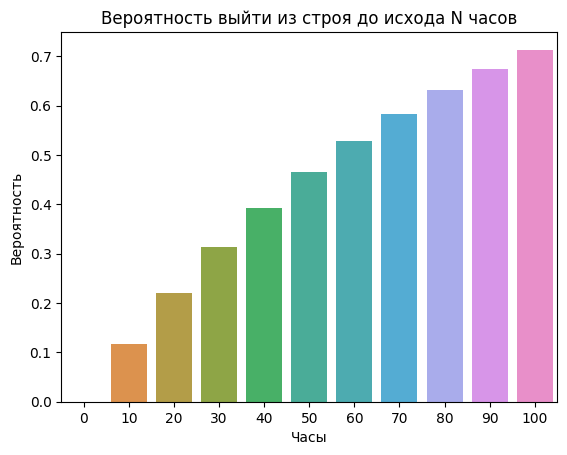

In [15]:
x = np.arange(101, step=10)
sns.barplot(x=x, y=exp_dist.cdf(x))
plt.title('Вероятность выйти из строя до исхода N часов')
plt.xlabel('Часы')
plt.ylabel('Вероятность')
plt.show()

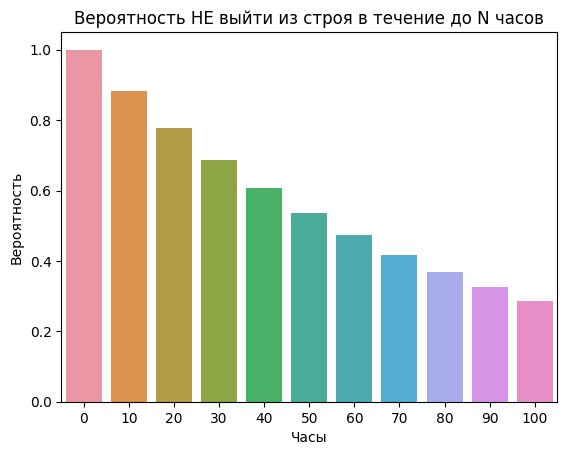

In [16]:
x = np.arange(101, step=10)
sns.barplot(x=x, y=exp_dist.sf(x))
plt.title('Вероятность НЕ выйти из строя в течение до N часов')
plt.xlabel('Часы')
plt.ylabel('Вероятность')
plt.show()

In [17]:
q3 = exp_dist.ppf(0.75)
print(f'Квантиль 75% равен {q3:.4f}. То есть с вероятностью 75% должно пройти более {q3:.2f} дней, чтобы прибор отказал')

Квантиль 75% равен 110.9035. То есть с вероятностью 75% должно пройти более 110.90 дней, чтобы прибор отказал


### 2.

Известно, что время работы прибора до первого отказа подчиняется показательному распределению со средним значением 1 год.  
Какова вероятность, что до первого отказа пройдет не менее 2 лет?

In [18]:
lmbda_ = 1
ch = stats.expon(scale=lmbda_)
res = 1 - ch.cdf(2)
print(f'Вероятность, что прибор отработает не менее двух лет - {res:.4f}')

Вероятность, что прибор отработает не менее двух лет - 0.1353


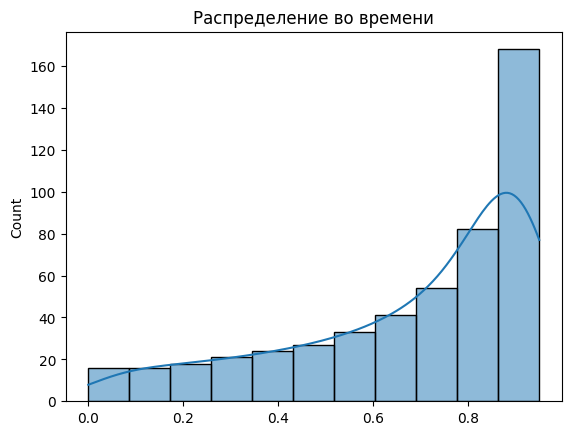

In [19]:
years = np.linspace(0,3, 500)
sns.histplot(ch.cdf(years), kde=True)
plt.title('Распределение во времени')
plt.show()

## 2.

Время между звонками в среднем составляет 15 минут. Вероятность того, что позвонят в течение 5-8 минут?

In [20]:
expon_mean = 15 # 1/lambda = 15
expon_dist = stats.expon(scale=expon_mean)

answer = expon_dist.cdf(8) - expon_dist.cdf(5)
print(f'Вероятность звонка в течение 5-8 составляет {answer:.4f}')

Вероятность звонка в течение 5-8 составляет 0.1299


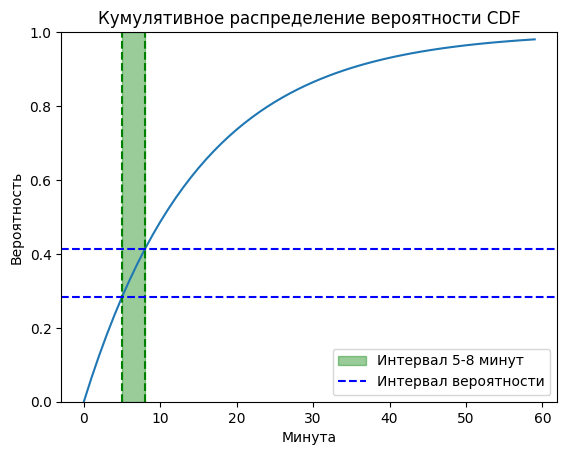

In [21]:
time_int = np.arange(0,60)
sns.lineplot(expon_dist.cdf(time_int))
plt.axvline(8, linestyle='--', color='green')
plt.axvline(5, linestyle='--', color='green')
plt.fill_between((5,8), y1=1.0, alpha=0.4, color='green', label='Интервал 5-8 минут')

plt.axhline(expon_dist.cdf(8), linestyle='--', color='blue', label='Интервал вероятности')
plt.axhline(expon_dist.cdf(5), linestyle='--', color='blue')
plt.ylim(0,1)
plt.legend()
plt.title('Кумулятивное распределение вероятности CDF')
plt.xlabel('Минута')
plt.ylabel('Вероятность')
plt.show()

## 3.

Длительность телефонного разговора является случайной величиной, распределенной по показательному закону.  
Известно, что средняя длительность телефонного разговора равна 9 минутам. Найти вероятность того, что разговор будет длиться:

а) не более 5 минут.

б) более 5 минут.

In [22]:
mean_value = 9
expon_dist = stats.expon(scale=mean_value)

answer_a = expon_dist.cdf(5)
answer_b = 1 - expon_dist.cdf(5)
print(f'а) Вероятность составляет {answer_a:.4f}')
print(f'b) Вероятность составляет {answer_b:.4f}')

а) Вероятность составляет 0.4262
b) Вероятность составляет 0.5738


## 4.

В среднем батарейка работает 12 дней. Какова доля батареек, проработающих более 9 дней?

In [23]:
answer = 1 - stats.expon(scale=12).cdf(9) 
print(f'Доля батареек составляет {answer:.4f}')

Доля батареек составляет 0.4724


## 5.

Служащий рекламного агентства утверждает, что время, в течение которого телезрители помнят содержание коммерческого рекламного ролика, подчиняется экспоненциальному закону с lambda = 0.25.  

Найти долю зрителей, способных вспомнить рекламу спустя 7 дней.

In [24]:
mean_exp = 1 / 0.25
answer = 1 - stats.expon(scale=mean_exp).cdf(7)
print(f'Процент зрителей, кто вспомнит рекламу,  составляет {answer * 100:.2f}')

Процент зрителей, кто вспомнит рекламу,  составляет 17.38


## 6.

Среднее количество минут между извержениями определенного гейзера составляет 40 минут.  

Если гейзер только что извергся, какова вероятность того, что нам придется ждать следующего извержения менее 50 минут?

In [25]:
mean_value = 40
exp_func = stats.expon(scale=mean_value)
answer = exp_func.cdf(50)

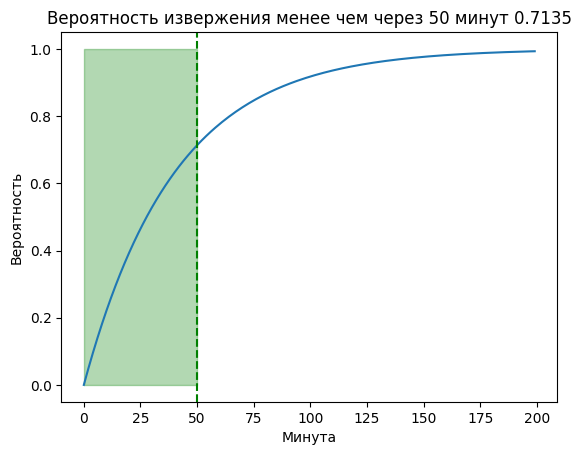

In [26]:
minutes = np.arange(200)
sns.lineplot(exp_func.cdf(minutes))
plt.axvline(50, linestyle='--', color='green')
plt.fill_between((0, 50), 1, color='green', alpha=0.3)
plt.title(f'Вероятность извержения менее чем через 50 минут {answer:.4f}')
plt.xlabel('Минута')
plt.ylabel('Вероятность')
plt.show()

## 7.
Предположим, что новый покупатель заходит в магазин в среднем каждые две минуты.  

После прихода клиента найти вероятность того, что новый клиент прибудет менее чем за одну минуту.

In [27]:
mean_value = 2
exp_func = stats.expon(scale=mean_value)
answer = exp_func.cdf(1)
print(f'Вероятность, что менее чем через минуту придет следующий покупатель {answer:.4f}')

Вероятность, что менее чем через минуту придет следующий покупатель 0.3935


# Гамма Распределение

Событие зависит от череды событий, распределение которых распределено экспоненциально

# 1.
Сложный механизм может работать, пока из строя не вышло по меньшей мере 15 узлов. Безотказный срок работы такого узла около 10 месяцев. Какова вероятность, что механизм сможет отработать 10 лет? Когда вероятнее всего он сломается?

In [28]:
n_nodes = 15
lambda_ = 10
gamma_dist = stats.gamma(a=n_nodes, scale=lambda_)

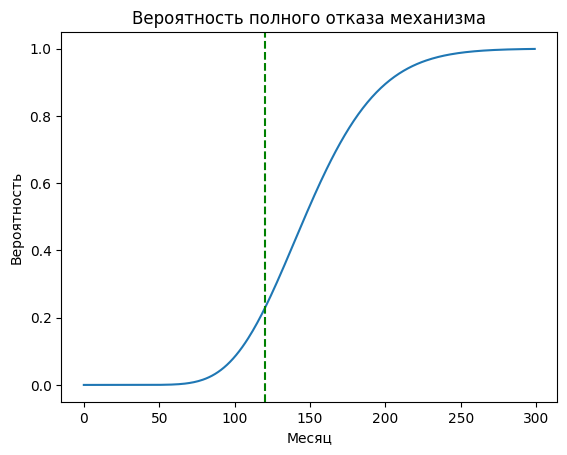

Вероятность отказа механизма до 10 лет: 0.2280
Вероятность того, что механизм будет работоспособен до 10 лет: 0.7720


In [29]:
monthes = np.arange(300)
sns.lineplot(x=monthes, y=gamma_dist.cdf(monthes))
plt.axvline(10 * 12, linestyle='--', color='green')
plt.title('Вероятность полного отказа механизма')
plt.xlabel('Месяц')
plt.ylabel('Вероятность')
plt.show()
print(f'Вероятность отказа механизма до 10 лет: {gamma_dist.cdf(10 * 12):.4f}')
print(f'Вероятность того, что механизм будет работоспособен до 10 лет: {1 - gamma_dist.cdf(10 * 12):.4f}')

Вероятность полной поломки оборудования с 95% уверенностью лежит в пределах [83.95, 234.9] месяцев


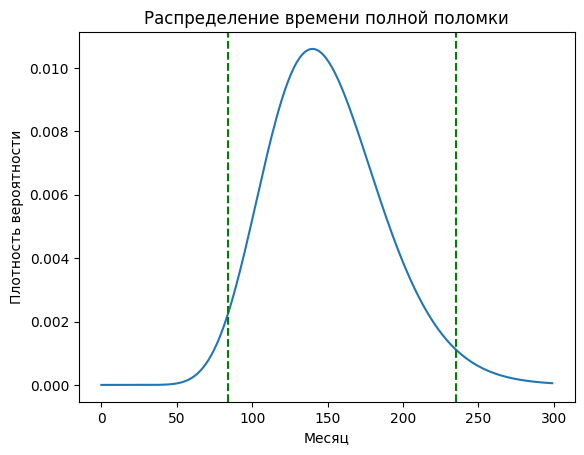

In [30]:
sns.lineplot(x=monthes, y=gamma_dist.pdf(monthes))
plt.axvline(gamma_dist.interval(0.95)[0], linestyle='--', color='green')
plt.axvline(gamma_dist.interval(0.95)[1], linestyle='--', color='green')
plt.title('Распределение времени полной поломки')
plt.xlabel('Месяц')
plt.ylabel('Плотность вероятности')
print('Вероятность полной поломки оборудования с 95% уверенностью лежит в пределах '+
      f'{[np.round(i, 2) for i in gamma_dist.interval(0.95)]} месяцев')

## 2. ЗАДАЧА на 3 распределения

### 1. Гамма
В воскресенье в кофейню заходят ~ 15 человек в час. Какова вероятность, что первых трех клиентов <b>нужно ждать менее 10 минут</b>?

Вероятность, что 3 человека зайдут в течение 10 минут 0.4562
Время, в течение которого с 95% увероятностью первые 3 человека зайдут в кофейню 2.5 - 28.9 минут
С вероятностью 90% три человека зайдет в кофейню до 21.3 минуты



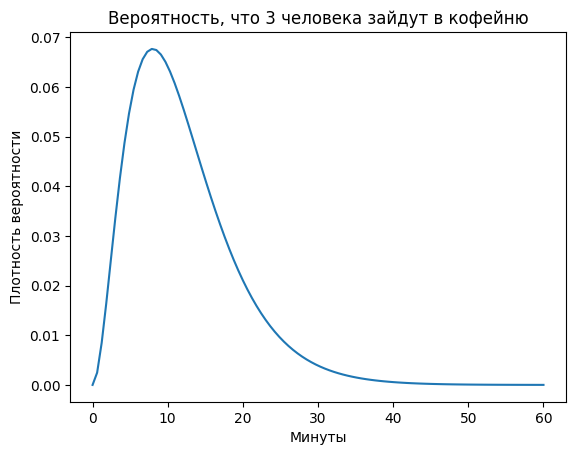

In [31]:
lambda_ = 15 / 60
a = 3 # число успехов
time = 10 # верхний предел времени

gamma_dist = stats.gamma(scale= 1/lambda_, a=a)
answer = gamma_dist.cdf(time) # P(X < 10)
ci = gamma_dist.interval(0.95)
print(f'Вероятность, что 3 человека зайдут в течение 10 минут {answer:.4f}')
print(f'Время, в течение которого с 95% увероятностью первые 3 человека зайдут в кофейню {ci[0]:.1f} - {ci[1]:.1f} минут')
print(f'С вероятностью 90% три человека зайдет в кофейню до {gamma_dist.ppf(0.90):.1f} минуты')

minutes = np.linspace(0, 60, 100) # первый час
sns.lineplot(x=minutes, y=gamma_dist.pdf(minutes))

print('')
plt.title('Вероятность, что 3 человека зайдут в кофейню')
plt.xlabel('Минуты')
plt.ylabel('Плотность вероятности')
plt.show()


### 2. Пуассон
То же кафе, но какова вероятность, что в течение первого получаса <b>придет ровно 10 посетителей</b>? Не более 10 посетителей? 

In [32]:
lambda_ = 15 / 2 # т.к. за 1 час в среднем приходит 15 человек, а нам нужны полчаса
customers = 10 # столько
poisson_dist = stats.poisson(mu=lambda_)
answer = poisson_dist.pmf(customers)
answer_2 = poisson_dist.cdf(customers)
print(f'Вероятность увидеть ровно {customers} посетителей за полчаса равна {answer:.2%}')
print(f'Вероятность увидеть не более {customers} посетителей за полчаса равна {answer_2:.2%}')

Вероятность увидеть ровно 10 посетителей за полчаса равна 8.58%
Вероятность увидеть не более 10 посетителей за полчаса равна 86.22%


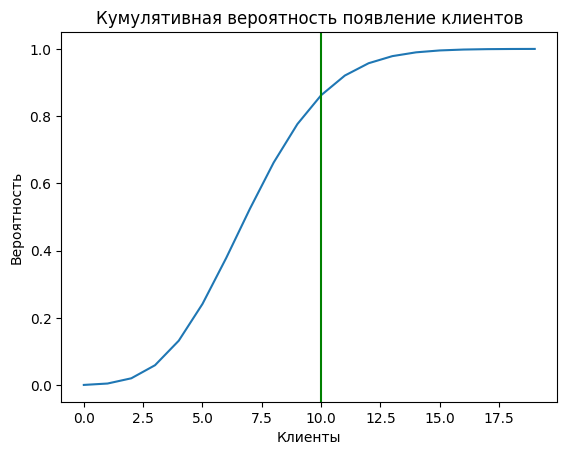

In [33]:
xx = np.arange(0,20)
sns.lineplot(x=xx, y=poisson_dist.cdf(xx))
plt.axvline(customers, color='green')
plt.title('Кумулятивная вероятность появление клиентов')
plt.xlabel('Клиенты')
plt.ylabel('Вероятность')
plt.show()

### 3. Экспонента
Какова вероятность, что <b>следующий клиент появится менее чем через 2 минут</b> после последнего, если в среднем за один час кофейню посещают те же 15 человек

In [34]:
lambda_ = 60/15  # т.к. средняя разница между клиентами
ex_dist = stats.expon(scale=lambda_)
time = 2
answer = ex_dist.cdf(time)
print(f'Вероятность, что слеюущий клиент появится в течение двух минут {answer:.2%}')

Вероятность, что слеюущий клиент появится в течение двух минут 39.35%


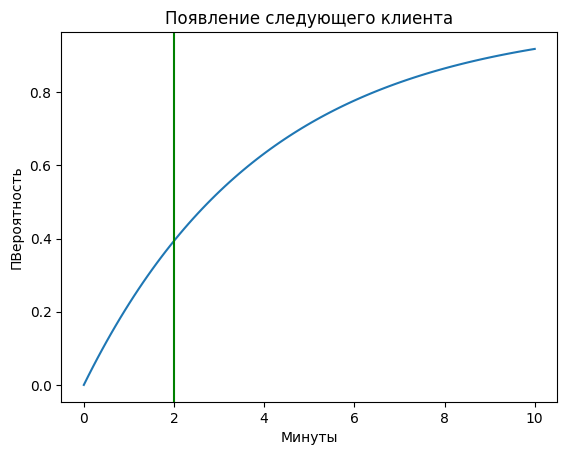

In [35]:
xx = np.linspace(0,10,100)
sns.lineplot(x=xx, y=ex_dist.cdf(xx))
plt.axvline(time, color='green')
plt.title('Появление следующего клиента')
plt.xlabel('Минуты')
plt.ylabel('ПВероятность')
plt.show()

# Бета Распределение (вероятность вероятности)

## 1.

75% дешевых лампочек перегорает в течение 1 месяца.  

Какова вероятность того, что коэффициент перегорания будет более 80% (то есть, какова вероятность того, что 75% лампочек перегорит с вероятностью выше 80%)?

Mean 0.7500
Std 0.0431
Вероятность перегорания 75% лампочек лежит в интервале 0.66 и 0.83
Вероятность того, что 75% лампочек перегоритт с вероятностью более 80% составляет 0.1204


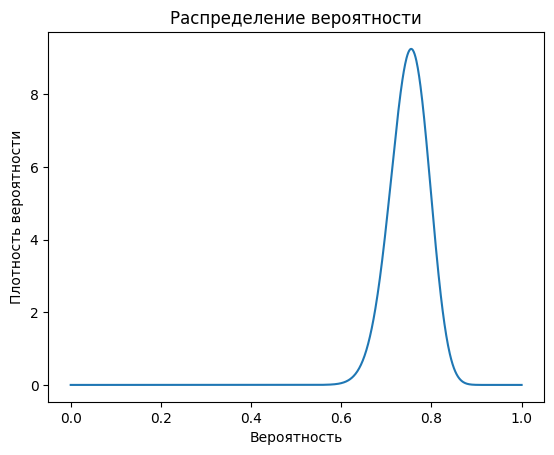

In [36]:
bulbs = 100

alpha = 75 # успех, точнее перегорание
beta = bulbs - alpha
beta_dist = stats.beta(a=alpha, b=beta)

x = np.linspace(0, 1,1000)
sns.lineplot(y=beta_dist.pdf(x), x=x)
plt.title('Распределение вероятности')
plt.xlabel('Вероятность')
plt.ylabel('Плотность вероятности')
print(f'Mean {alpha / (alpha + beta):.4f}')
print(f'Std {np.sqrt((alpha * beta) / ((alpha + beta + 1) * (alpha + beta) ** 2)):.4f}')
ci = beta_dist.interval(0.95)
print(f'Вероятность перегорания 75% лампочек лежит в интервале {ci[0]:.2f} и {ci[1]:.2f}')


answer = 1 - beta_dist.cdf(0.8)
print(f'Вероятность того, что 75% лампочек перегоритт с вероятностью более 80% составляет {answer:.4f}')

## 2.

Монета была подброшена 19 раз и 15 раз выпал орел. Честная ли монета?

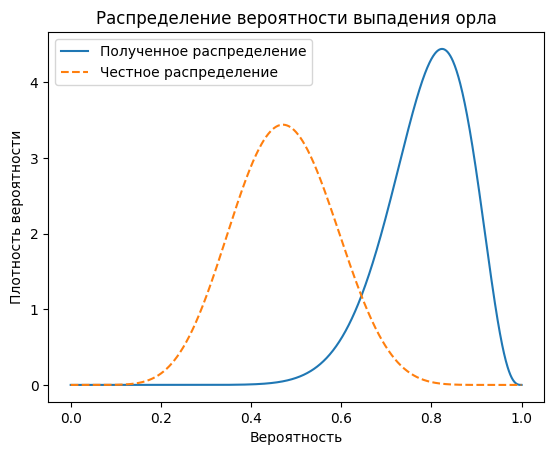

Вероятность того, что монета честная - 0.0038
Вероятность того, что монета не честная - 0.9962


In [37]:
times = 19
tail = 15 # успех
head = times - tail
beta_dist = stats.beta(a=tail, b=head)

# сгенерируем честную монету
check = np.random.binomial(n=1, p=0.5, size=times)
check_tail, check_head = np.sum(check), times - np.sum(check)
beta_dist_check = stats.beta(a=check_tail, b=check_head)

x = np.linspace(0, 1,1000)
sns.lineplot(x=x, y=beta_dist.pdf(x), label='Полученное распределение')
sns.lineplot(x=x, y=beta_dist_check.pdf(x), label='Честное распределение', linestyle='--')

plt.title('Распределение вероятности выпадения орла')
plt.xlabel('Вероятность')
plt.ylabel('Плотность вероятности')
plt.show()

get_tail = beta_dist.cdf(0.5)
print(f'Вероятность того, что монета честная - {get_tail:.4f}')
print(f'Вероятность того, что монета не честная - {1 - get_tail:.4f}')

# Доверительный интервал

Установить 95% доверительный интервал для среднего веса людей из выборки

In [38]:
weights = np.random.randint(50, 110, size=500)

mean_values = []
for _ in range(10000):
    curr_samples = np.random.choice(weights, size=100, replace=True)
    curr_mean = curr_samples.mean()
    mean_values.append(curr_mean)

mean_values = np.array(mean_values)

In [39]:
# доверительные интервалы аналитически
result = stats.norm.interval(
                            alpha=0.95, # доверительный интервал
                            loc = weights.mean(), # среднее выборки
                            scale = stats.sem(weights) # стандартная ошибка среднего
)
print(result)

(76.61165038306213, 79.68834961693788)


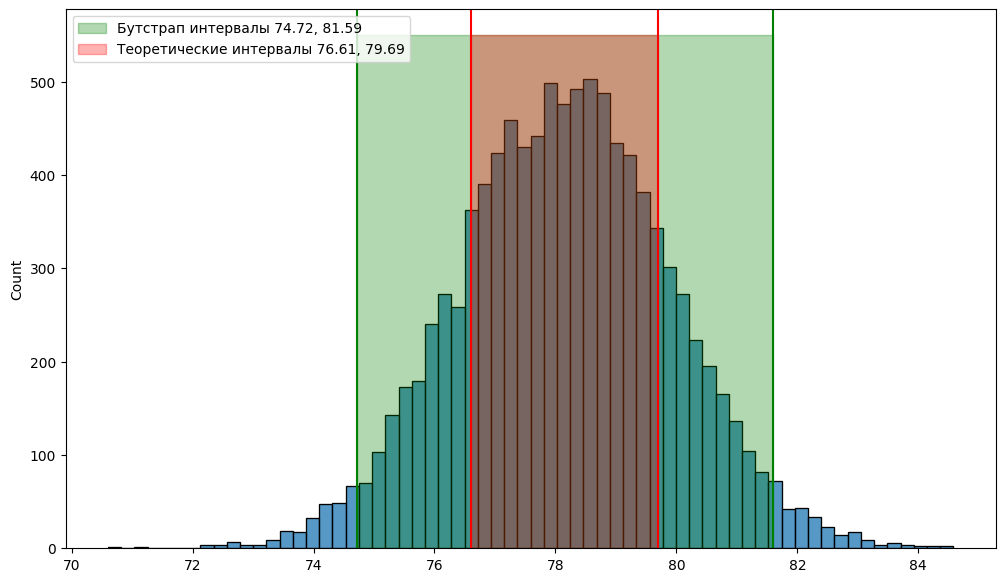

In [40]:
# с использованием бутстрапа
plt.figure(figsize=(12,7))
sns.histplot(mean_values)

q1 = np.quantile(mean_values, (1-0.95)/2)
q2 = np.quantile(mean_values, 1-(1-0.95)/2)
plt.axvline(q1, color='green')
plt.axvline(q2, color='green')
plt.fill_between((q1, q2), 550, color='green', alpha=0.3, label=f'Бутстрап интервалы {q1:.2f}, {q2:.2f}')

plt.axvline(result[0], color='red')
plt.axvline(result[1], color='red')
plt.fill_between((result[0], result[1]), 550, color='red', alpha=0.3,
                 label=f'Теоретические интервалы {result[0]:.2f}, {result[1]:.2f}')
plt.legend()
plt.show()


Теортические интервалы более в себе уверены чем квантили бутстрапа, размах которых шире